# Exploring Word Embeddings with GloVe and Numpy

In this exercise, we will delve into the intricacies of word embedding using the Global Vectors for Word Representation (GloVe) [1]. We'll utilize the 6B dataset to craft examples illustrating word analogies and word similarities. Additionally, we will visualize how these vectors encapsulate the semantic essence of words using charts generated with PCA and t-SNE.

## First Steps

To kick off our exercise, we will import relevant Python libraries and load the dataset containing words along with their associated vectors. Furthermore, we'll serialize this data, enabling us to reuse it in subsequent exercises.

### Import libraries

We begin by importing our Python libraries.

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h4 style="margin-top:0;">Code Documentation</h4>
    <b>What:</b><br>
    We will import several Python libraries to facilitate our exercise. Specifically, we'll be using numpy, pickle, sklearn, and matplotlib.
<br><br>
    <b>Why:</b><br>
    Here's why we've chosen these libraries and what they'll be used for:
    <ul>
    <li><b>Numpy:</b> This will be our primary tool for working with embeddings.</li>
    <li><b>Pickle:</b> This will help us serialize the dataset, making it accessible for future exercises.</li>
    <li><b>Sklearn's t-SNE:</b> With t-SNE, we'll visualize clusters of words to understand their semantic relationships.</li>
    <li><b>Sklearn's PCA:</b> Similar to t-SNE, we'll use PCA to visualize word clusters and their semantic proximities.</li>
    <li><b>Matplotlib:</b> This library will enable us to generate the required charts.</li>
    </ul>
    <b>How:</b><br>
    We'll achieve our objectives by importing the aforementioned libraries, all of which should already be installed.
<br><br>
</div>


In [1]:
# Import libraries
import numpy as np
import pickle

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Load file

We will begin with the data, which can be downloaded from: https://nlp.stanford.edu/data/glove.6B.zip. After downloading, we'll unzip the file and place it in the same folder as this exercise. The data is provided in a text format, so we'll transform it to create dictionaries pairing words with their corresponding vectors. Lastly, we'll serialize this data, facilitating future imports in the dictionary format.

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h4 style="margin-top:0;">Code Documentation</h4>
    <b>What:</b><br>
    We will access one of the various datasets from the 6B GloVe examples. Our goal is to transform this dataset into a dictionary of embedded values, where each word acts as a key, and its corresponding vector forms the values.
<br><br>
    <b>Why:</b><br>
    We need this dataset in our environment to perform visualizations and to explore word similarities and analogies. 
    <br><br>
    <b>How:</b><br>
    We will read a file of various dimensions (50, 100, ..., 300). For each line in the file, the word (first value), will be used as the key for an initially empty dictionary, while the vector values on the same line will be assigned as its values.
<br><br>
</div>


In [2]:
# Define dimensions and txt file to use
emb_dim = 50
PATH = f'./glove.6B.{emb_dim}d.txt'

In [3]:
# Create dictionary with embeddings
def create_emb_dictionary(path: str) -> dict:
    """
    Create a dictionary with embeddings from a given file.

    Parameters:
    - path (str): The path to the file containing embeddings.

    Returns:
    - dict: A dictionary with words as keys and their embeddings as values.
    """
    
    embeddings_dict = {}
    
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.strip().split()
            word = values[0]
            embedding = np.array(values[1:], dtype='float32')
            embeddings_dict[word] = embedding
            
    return embeddings_dict

In [4]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

### Serialize file

We will serialize the file for future imports

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h4 style="margin-top:0;">Code Documentation</h4>
    <b>What:</b><br>
    We will serialize the embeddings dictionary so we can utilize it in other Python projects.
<br><br>
    <b>Why:</b><br>
    This ensures we can access the dictionary without needing the original text files or the methods previously defined.
    <br><br>
    <b>How:</b><br>
    We will employ the pickle library, leveraging the embeddings dictionary we've already created.
<br><br>
</div>

In [5]:
# Serialize
with open(f'embeddings_dict_{emb_dim}D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

## Explore Embeddings

At this point, we possess an object named embeddings_dict that houses the embeddings for each word. These vector values serve as representations of the semantic characteristics of individual words [1]. As a result, words with similar attributes or meanings are closer in this vector space. Initially, we'll inspect these embeddings in their native vector format. Subsequently, by employing dimensionality reduction techniques, we'll observe how similar words cluster together.

Once we've gained an intuitive grasp of semantic proximity, we'll further delve into this by constructing analogies and identifying akin words, this should allow us to understand why embeddings offer interpretations for both machines and humans.

### See some embeddings

We will visualize some of the embeddings of the file we are using in the normal format: Word and numeric (real) values.

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h4 style="margin-top:0;">Code Documentation</h4>
    <b>What:</b><br>
    We will see some of the lines in the embedding files.
<br><br>
    <b>Why:</b><br>
    This will allow us to visualize the data we are working with. While this data might not be meaningful for us, it does contain numbers so it will allow us to see that for each word (TOKEN), we have a numerical representation of it.
    <br><br>
    <b>How:</b><br>
    We will create a function that takes a file path and a number of lines and display the TOKEN, the embedding values and the length of those values.
<br><br>
</div>

In [6]:
# Show some
def show_n_first_words(path, n_words) -> list:
    """
    Prints a number of words from a 60B dataset

    Parameters:
    - path (str): The path to the file containing embeddings.

    Returns:
    - n_words: How many of the first lines will be displayed.
    """
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            values = line.strip().split()
            print('TOKEN:', values[0])
            print('Values: ', values[1:])
            print('Length: ', len(values[1:]))
            print('\n')
            if i>=n_words: break
    return

In [7]:
show_n_first_words(PATH, 5)

TOKEN: the
Values:  ['0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581']
Length:  50


TOKEN: ,
Values:  ['0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3

### Plot some embeddings

We've visualized some of the numerical values, which exist in an n-dimensional space. Given the high dimensionality, these values are not something we can easily interpret or visualize. However, in this section, we will reduce the dimensions to 2, enabling us to better visualize the embeddings. The objective is to observe that semantically similar words cluster closely together in the reduced space.


<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h4 style="margin-top:0;">Code Documentation</h4>
    <b>What:</b><br>
    We'll visualize word embeddings from our dictionary after reducing their dimensionality. To streamline this process, we'll define a select set of words.
<br><br>
    <b>Why:</b><br>
    This exercise aims to foster an intuitive understanding of word embeddings. By visualizing them, we can see how their vector representations lead to semantic proximity or similarity between words.
    <br><br>
    <b>How:</b><br>
    We'll employ PCA or t-SNE algorithms to reduce the dimensions of the embeddings to 2. With a predefined set of words, we'll harness their vector representations for the chosen reduction method and plot them in a 2D space.
<br><br>
</div>

In [8]:
# Function to reduce and plot embeddings
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA) -> plt:
    """
    Function to visualize embeddings in 2 or 3 dimensions using either PCA or t-SNE.

    Args:
    - emb_path: path to the embeddings
    - words2show: words to visualize
    - emb_dim: dimension of the embeddings
    - embeddings_dict: dictionary of word embeddings
    - func: function for dimensionality reduction (default is PCA)
    - num_components: number of components for visualization (default is 2)

    Returns:
    - plot showing the word embeddings
    """
    
    assert func in [PCA, TSNE], 'Unsupported dimensionality reduction method'

    num_components = 2
    
    # Filter embeddings for the words you want to show
    filtered_embeddings = {
        word: embeddings_dict[word] for word in words2show if word in embeddings_dict}

    # Get the word vectors and words
    word_vectors = np.array(list(filtered_embeddings.values()))
    words = list(filtered_embeddings.keys())

    # Apply dimensionality reduction using the specified method (PCA or t-SNE)
    if func == PCA:
        reducer = PCA(n_components=num_components)
    elif func == TSNE:
        reducer = TSNE(n_components=num_components)

    reduced_embeddings = reducer.fit_transform(word_vectors)

    # Plot the reduced embeddings
    x, y = reduced_embeddings.T
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y)
    for i, word in enumerate(words):
        plt.annotate(word, (x[i], y[i]))
    plt.title(f'{func.__name__} Visualization of Word Embeddings')
    plt.show()

In [9]:
# Words to define
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


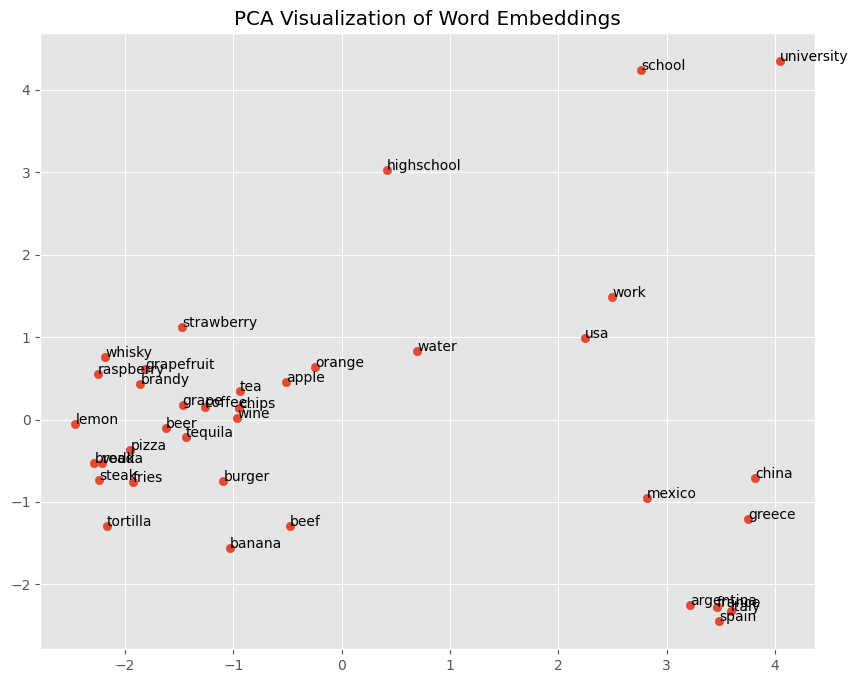

In [10]:
# PCA dimensionality reduction for visualization
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

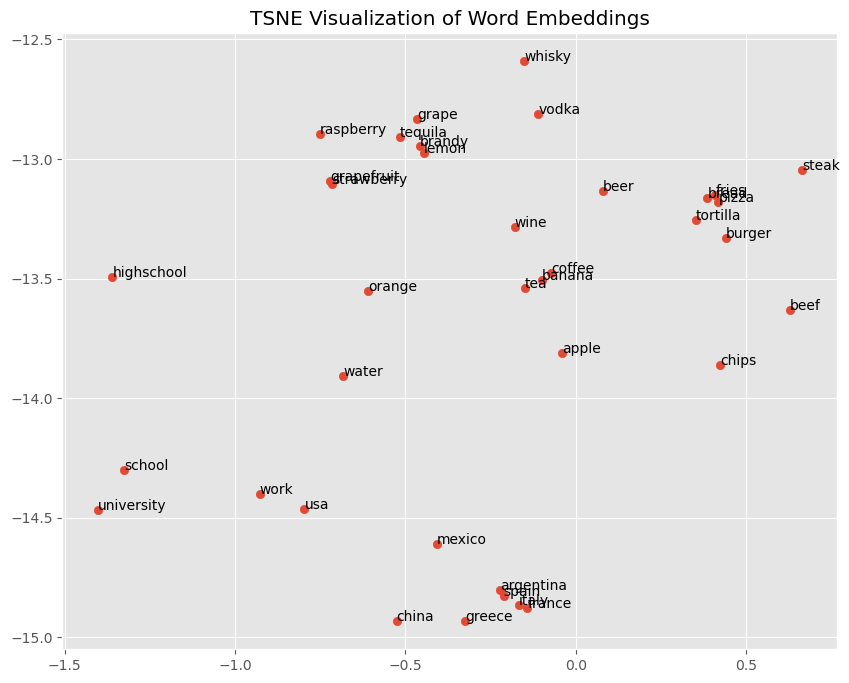

In [11]:
# t-SNE dimensionality reduction for visualization
plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

Now that we have visualized that words with simmilar properties tend to be together in our dimensionality reduction examples, we will test more in depth the validity of the hypothesis that semantic features are represented in these embeddings. For that we will use an exercise of generating analogies.


Here's the enhanced content:

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h4 style="margin-top:0;">Code Documentation</h4>
    <b>What:</b><br>
    We're introducing a function to generate analogies using word embeddings.
<br><br>
    <b>Why:</b><br>
    The aim is to ascertain whether semantic features are accurately captured within the embeddings.
    <br><br>
    <b>How:</b><br>
    Exploiting the numerical nature of word embeddings, the function will manipulate the vectors associated with certain words (TOKENS) through mathematical operations such as addition and subtraction. For example, by subtracting a specific attribute from one word and adding another, we can conceptually shift a word's properties (e.g., altering gender or royalty as in the "king" to "queen" transition using "male" and "female" attributes). After deriving a new vector representation, the function searches the embeddings dictionary to identify the closest vector, yielding the desired analogy.
<br><br>
</div>

In [12]:
# Function to find analogies
def find_analogy(word1, word2, word3, embeddings_dict) -> str:
    """
    Determine the word that completes the analogy: word1 to word2 is like word3 to ?

    Args:
    - word1 (str): First word in the analogy.
    - word2 (str): Second word in the analogy.
    - word3 (str): Third word in the analogy.
    - embeddings_dict (dict): Dictionary containing word embeddings.

    Returns:
    - str: Word that completes the analogy.
    """
    # Ensure all words are in the embeddings dictionary
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        return "One or more words are not in the embeddings dictionary."

    # Calculate the analogy vector
    analogy_vector = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]

    # Initialize best match parameters
    best_similarity = -float('inf')
    best_word = None

    # Find the word that completes the analogy
    for word, vector in embeddings_dict.items():
        if word not in [word1, word2, word3]:
            similarity = np.dot(analogy_vector, vector) / (np.linalg.norm(analogy_vector) * np.linalg.norm(vector))
            if similarity > best_similarity:
                best_similarity = similarity
                best_word = word

    return best_word

In [13]:
# Analogy example
w1 = 'man'
w2 = 'king'
w3 = 'woman'
w4 = find_analogy(w1, w2, w3, embeddings_dict)

print(f'{w1} is to {w2} as {w3} is to {w4}')

man is to king as woman is to queen


In [14]:
# Analogy example
w1 = 'good'
w2 = 'bad'
w3 = 'white'
w4 = find_analogy(w1, w2, w3, embeddings_dict)

print(f'{w1} is to {w2} as {w3} is to {w4}')

good is to bad as white is to black


### Find similar words

Next we will see simmilar words

<div style="border:2px solid #1E90FF; padding:15px; margin-top:5px; margin-bottom:5px; border-radius:15px; box-shadow:4px 4px 12px #aaa; background-color:#E6E6FA; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', cursive; color:#333;">
    <h4 style="margin-top:0;">Code Documentation</h4>
    <b>What:</b><br>
    A function to retrieve a list of the top 10 words most similar to a given input word, based on their embeddings.
<br><br>
    <b>Why:</b><br>
    Demonstrating that the embedding model can understand semantic relationships between words. For instance, it should be able to group related concepts together, such as foods with other foods, colors with other colors, and so on.
    <br><br>
    <b>How:</b><br>
    By leveraging the embeddings dictionary, we compute the cosine similarity between the vector representation of the input word and the vectors of all other words. The function then returns the top 10 words that have the highest similarity scores.
<br><br>
</div>


In [15]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10) ->list:
    """
    Find the top N most similar words to the given word based on their embeddings.

    Args:
    - word (str): The input word.
    - embeddings_dict (dict): Dictionary containing word embeddings.
    - top_n (int): Number of top similar words to return. Default is 10.

    Returns:
    - list: List of top N most similar words.
    """
    # Ensure the input word is in the embeddings dictionary
    if word not in embeddings_dict:
        return "The word is not in the embeddings dictionary."

    # Calculate the cosine similarities between the input word and all other words
    similarities = {}
    word_vector = embeddings_dict[word]
    for other_word, other_vector in embeddings_dict.items():
        if other_word != word:
            similarity = (np.dot(word_vector, other_vector) /
                          (np.linalg.norm(word_vector) * np.linalg.norm(other_vector)))
            similarities[other_word] = similarity

    # Sort the words by similarity and return the top N most similar words
    most_similar_words = sorted(similarities, key=similarities.get, reverse=True)[:top_n]

    return most_similar_words

In [16]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [17]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


## Conclussions

In this notebook, we delved deep into the intricacies of GloVe embeddings. Initially, we employed dimensionality reduction techniques to visually illustrate how semantically similar words tend to cluster together in the embedding space. We then showcased the power of these embeddings by performing "mathematical" operations on them, creating word analogies. This not only underlined the encapsulation of semantic features within the embeddings but also emphasized how they enable the computation of proximities and differences between words. In the concluding part, we capitalized on this understanding to discern similar words based on cosine similarity. This further reiterated the key insight: words of the same semantic category or nature are closely aligned in the embedding space.

## References

[1] J. Pennington, R. Socher, and C. D. Manning, "GloVe: Global Vectors for Word Representation," in Empirical Methods in Natural Language Processing (EMNLP), 2014, pp. 1532-1543. [Online]. Available: http://www.aclweb.org/anthology/D14-1162.



======================== End of Activity ========================